**Cenditya Ayu Aurelia**

**Kelas Fibonacci**

**20083010023**

# Analisis Sentimen Terhadap Tayangan Televisi Berdasarkan Opini Masyarakat pada Media Sosial Twitter menggunakan Algoritma Machine Learning Multinomial Naive Bayes
---
**dataset_tweet_sentimen_tayangan_tv.csv**

Skema Klasifikasi Analisis Sentimen Tayangan Televisi
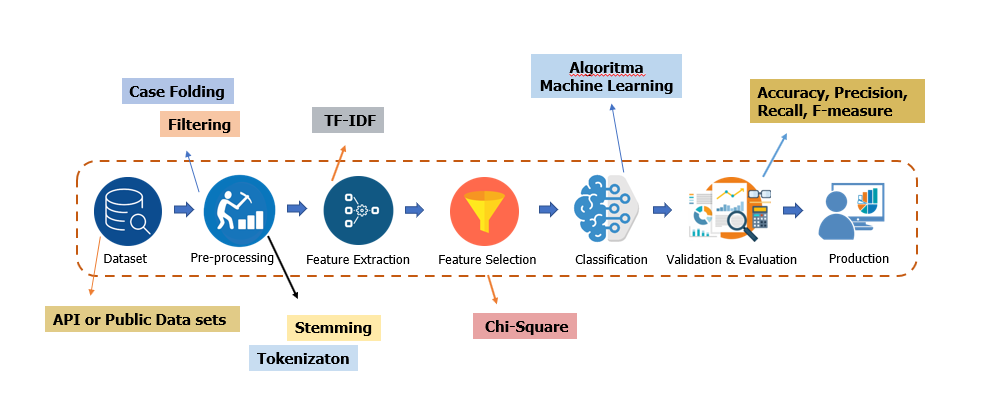

Langkah-langkah penyelesaian meliputi:
1. Data Acquisition
2. Text Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - BoW & TF IDF
   2. Feature Selection - Chi-Square
4. Modelling (Machine Learning)
5. Model Evaluation
6. Deployment


### 1. Data Acquisition

Penjelasan Label
* 0 : negative
* 1 : positive

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

In [ ]:
# Install Library Sastrawi
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Dataset**

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv

--2022-10-06 06:56:39--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46764 (46K) [text/plain]
Saving to: ‘dataset_tweet_sentimen_tayangan_tv.csv.1’

dataset_tweet_senti 100%[===================>]  45.67K  --.-KB/s    in 0.001s  

2022-10-06 06:56:39 (69.5 MB/s) - ‘dataset_tweet_sentimen_tayangan_tv.csv.1’ saved [46764/46764]



In [ ]:
# Membaca/loading dataset
data = pd.read_csv('dataset_tweet_sentimen_tayangan_tv.csv')
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
# Menampilkan deskriptif statistik data dari masing-masing kolom yang bertipe numerik
data.describe()

,Id,Jumlah Retweet
count,400.000000,400.000000
mean,200.500000,3.582500
std,115.614301,4.875204
min,1.000000,0.000000
25%,100.750000,0.000000
50%,200.500000,2.000000
75%,300.250000,5.000000
max,400.000000,19.000000


In [ ]:
# Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [ ]:
# Mengetahui apakah terdapat data duplikat
data.duplicated().sum()

0

Dari output diatas tidak terdapat duplikat pada data

In [ ]:
# Menampilkan ukuran dimensi dari dataset
data.shape

(400, 5)

Dari output diatas, ukuran dimensi yang dihasilkan terdapat 400 jumlah baris dan 5 jumlah kolom dari dataset

In [ ]:
# Memeriksa missing values
data.isnull().sum() 

Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64

Dari output diatas tidak memiliki missing value pada data sehingga data tersebut sudah aman

In [ ]:
# Memberikan penjelasan label 0 untuk sentimen negative dan label 1 untuk sentimen positive
print('Total Jumlah Sentimen Acara TV:', data.shape[0], 'data\n')
print('terdiri dari (Sentiment):')
print('-- [0] Sentimen negative\t:', data[data.Sentiment == 'negative'].shape[0], 'data')
print('-- [1] Sentimen positive\t:', data[data.Sentiment == 'positive'].shape[0], 'data')

Total Jumlah Sentimen Acara TV: 400 data

terdiri dari (Sentiment):
-- [0] Sentimen negative	: 200 data
-- [1] Sentimen positive	: 200 data


Dari output diatas memiliki 400 jumlah sentimen acara TV yang terdiri dari 200 data sentimen negative dan 200 data sentimen positive

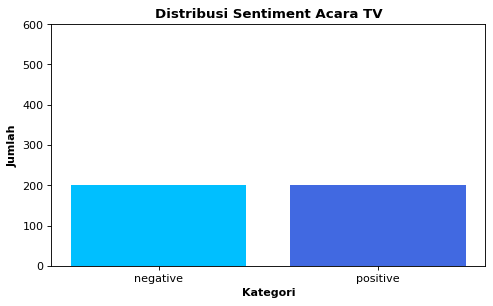

In [ ]:
# Melakukan visulisasi distribusi sentiment negative dan positive pada acara TV 
height = data['Sentiment'].value_counts()
labels = ('negative', 'positive')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentiment Acara TV', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

Dari visualisasi diatas menampilkan distribusi sentiment komentar positive dan negative pada acara TV dengan menggunakan Bar Chart

In [ ]:
# Mengubah label sentiment menjadi bentuk numerik agar dapat dibaca oleh mesin
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.Sentiment = label_encoder.fit_transform(data.Sentiment.values)

In [ ]:
# Menampilkan 5 baris teratas dari dataset
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
# Menampilkan 5 baris terakhir dari dataset
data.tail()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
395,396,0,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,0,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,0,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,0,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...
399,400,0,MataNajwaMetroTV,0,Jawab aja ga usah berbelit-belit. Muter2 ga je...


# 2. Text Preprocessing

**Case Folding**

Melakukan Case Folding untuk memproses text preprocessing dengan mengubah karakter pada data, yaitu :
1. Mengubah teks menjadi lower case

2. Menghapus URL pada text

3. Menghapus angka

4. Menghapus karakter tanda baca

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[80]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\nCase folding\t: ', case_folding)

Raw data	:  toleransi umat beragama macam apa yg diterapkan di Serang Banten? Toleransi hanya mitos #hitamPutihT7

Case folding	:  toleransi umat beragama macam apa yg diterapkan di serang banten toleransi hanya mitos hitamputiht


**Word Normalization**

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-06 07:03:11--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.001s  

2022-10-06 07:03:11 (51.8 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
# Mengubah kata tidak baku menjadi kata baku
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
print(key_norm.head(10))

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


(3720, 3)

In [ ]:
# Mengubah kata menjadi baku
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

**Filtering (Stopword Removal)**

Menghilangkan kata-kata yang tidak penting dalam Text Tweet

In [ ]:
# Import library yang akan digunakan untuk melakukan stopword removal
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
# Menampilkan panjang jumlah stopwords indonesia yang disediakan NLTK
len(stopwords_ind) 

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Menambahkan kata lain dalam stopword yang ingin dihilangkan
more_stopword = ['apa', 'banget', 'bego', 'cuma', 'cukup', 'dg', 'deh', 'bkin', 'usak', 'kok', 'klo', 'ga', 'gpp', 'gapapa', 'smoga', 'slamat', 'tdk', 'tak', 'moga', 'macam', 'hnya', 'pke', 'nih', 'ni', 'nie', 'tau', 'yg', 'ya', 'yaa']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

# Buat fungsi untuk langkah stopword removal
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [ ]:
raw_sample = data['Text Tweet'].iloc[80]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('\nCase folding\t\t: ', case_folding)
print('\nStopword removal\t: ', stopword_removal)

Raw data		:  toleransi umat beragama macam apa yg diterapkan di Serang Banten? Toleransi hanya mitos #hitamPutihT7

Case folding		:  toleransi umat beragama macam apa yg diterapkan di serang banten toleransi hanya mitos hitamputiht

Stopword removal	:  toleransi umat beragama diterapkan serang banten toleransi mitos hitamputiht


**Stemming**

Mengubah kata menjadi kata dasarnya

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[80]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  toleransi umat beragama macam apa yg diterapkan di Serang Banten? Toleransi hanya mitos #hitamPutihT7
Case folding		:  toleransi umat beragama macam apa yg diterapkan di serang banten toleransi hanya mitos hitamputiht
Stopword removal	:  toleransi umat beragama diterapkan serang banten toleransi mitos hitamputiht
Stemming		:  toleransi umat agama terap serang banten toleransi mitos hitamputiht


**Text Preprocessing Pipeline**

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
# Menambahkan column 'clean_teks' yang telah diproses pada text preprocessing diatas
%%time
data['clean_teks'] = data['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 2 s, sys: 83.6 ms, total: 2.09 s
Wall time: 1.96 s


In [ ]:
# Menampilkan dataset
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,clean_teks
0,1,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt hitamputih menang ssk jakart...
1,2,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah terima all...
2,3,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",trans hitam putih harga norwegia hitamputih
3,4,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat mas adietaufan masuk hitamputih
4,5,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans
...,...,...,...,...,...,...
395,396,0,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...,kesel orang debat pakai emosi matanajwametrotv
396,397,0,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...,orang miskin miskin sekolah pungut liar
397,398,0,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame...",emosi cepat tua nonton matanajwametrotv lihat ...
398,399,0,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...,tampil preman tau kisruh usak matanajwametrotv


In [ ]:
# Menyimpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# 3. Feature Engineering

Pada feature engineering berfungsi untuk memisahkan kolom fitur dan target dengan variabel X menampilkan 'clean_teks' dan variabel y menampilkan 'Sentiment' yang sudah diberikan label berupa numerik dengan menggunakan library Label Encoder yang memiliki keterangan 1 adalah sentiment positive dan 0 adalah sentiment negative.

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['Sentiment']

In [ ]:
# Menampilkan data clean teks yang telah dilakukan pada saat tahap text preprocessing 
X

0      undang n shanijkt hitamputih menang ssk jakart...
1      selamat buka puasa moga amal ibadah terima all...
2            trans hitam putih harga norwegia hitamputih
3                selamat mas adietaufan masuk hitamputih
4                       asiknya nonton hitam putih trans
                             ...                        
395       kesel orang debat pakai emosi matanajwametrotv
396              orang miskin miskin sekolah pungut liar
397    emosi cepat tua nonton matanajwametrotv lihat ...
398       tampil preman tau kisruh usak matanajwametrotv
399      berbelitbelit putar buang mutu matanajwametrotv
Name: clean_teks, Length: 400, dtype: object

In [ ]:
# Menampilkan data Sentiment
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Sentiment, Length: 400, dtype: int64

**Feature Extraction (Bag of Words & N-Gram)**

Proses mengubah teks menjadi vektor menggunakan metode BoW

In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - bigram
bow = CountVectorizer(ngram_range=(1,2))
bow.fit(X)

CountVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat jumlah fitur
print(len(bow.get_feature_names_out()))

3368


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(bow.get_feature_names_out())

['aa' 'aa gym' 'aa gymnastiar' ... 'zaitun rasmin' 'zhonk'
 'zhonk kickandymetrotv']


In [ ]:
# Melihat matriks jumlah fitur
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,aa,aa gym,aa gymnastiar,aagym,aagym partai,abang,abang acara,abas,abas anjay,abi,...,yuk,yuk nonton,yuk tonton,yuk tweeps,yukikatou,yukikatou nongol,zaitun,zaitun rasmin,zhonk,zhonk kickandymetrotv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dari output diatas terdiri dari 400 baris dan 3368 kolom.

In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(X_bow, output)

**Feature Extraction (TF-IDF & N-Gram)**

Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(X)

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

3368


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa' 'aa gym' 'aa gymnastiar' ... 'zaitun rasmin' 'zhonk'
 'zhonk kickandymetrotv']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aa gym,aa gymnastiar,aagym,aagym partai,abang,abang acara,abas,abas anjay,abi,...,yuk,yuk nonton,yuk tonton,yuk tweeps,yukikatou,yukikatou nongol,zaitun,zaitun rasmin,zhonk,zhonk kickandymetrotv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dari output diatas terdiri dari 400 baris dan 3368 kolom.

In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

**Feature Selection (Chi Square)**

In [ ]:
# Mengub#ah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=500) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 3368
Reduced feature number: 500


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.793109
1,0.521906
2,0.333342
3,0.244436
4,0.244436
...,...
3363,0.330585
3364,0.351302
3365,0.351302
3366,0.229672


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.793109,aa
1,0.521906,aa gym
2,0.333342,aa gymnastiar
3,0.244436,aagym
4,0.244436,aagym partai
...,...,...
3363,0.330585,yukikatou nongol
3364,0.351302,zaitun
3365,0.351302,zaitun rasmin
3366,0.229672,zhonk


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
1461,5.706543e+00,keren
1048,5.354965e+00,hitamputiht
1187,4.262589e+00,inspirasi
1536,3.956864e+00,kickandymetrotv
1039,3.652803e+00,hitam putih
...,...,...
828,8.823291e-05,episode
2388,1.409085e-05,pihak
1370,1.268364e-05,kandang
2832,6.887770e-06,si


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True,  True, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aa',
 'aa gym',
 'abraham',
 'acara',
 'acara hitam',
 'acara inspirasi',
 'acara televisi',
 'adem',
 'adem indonesialawyersclub',
 'adil',
 'adil kickandymetrotv',
 'adu',
 'agung',
 'agung tuhan',
 'agung undang',
 'ajang',
 'ajar gusdur',
 'ala',
 'allah',
 'anak',
 'anak imajinasi',
 'anak nonton',
 'anak nya',
 'ancam',
 'aneh',
 'angkat',
 'angkat berat',
 'angket',
 'angket ilc',
 'anies',
 'aniesbaswedan',
 'anis baswedan',
 'anis fitnah',
 'apa',
 'apartemen',
 'apartemen kickandy',
 'asal',
 'asik',
 'asik hitam',
 'asiknya',
 'asiknya nonton',
 'bacot',
 'bacot jaga',
 'bagus',
 'bagus lihat',
 'bahagia',
 'bahasa',
 'baik',
 'bangga',
 'bangga ilc',
 'bangkrut',
 'basuki',
 'basuki btp',
 'baswedan',
 'batal',
 'bawa',
 'bawa acara',
 'bayang',
 'bayar',
 'beda kelas',
 'benar mata',
 'benci',
 'berani',
 'berani kickandy',
 'berat',
 'berat seasia',
 'bersih',
 'besok',
 'biaya',
 'bicara',
 'bicara ribet',
 'bidik',
 'bijaksana',
 'bikin rindu',
 'bilang',
 'bintang ta

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'hitamputih': 1040,
 'menang': 1878,
 'prestasi': 2447,
 'selamat': 2749,
 'buka': 544,
 'moga': 1962,
 'terima': 3077,
 'allah': 133,
 'trans': 3150,
 'hitam': 1036,
 'putih': 2488,
 'trans hitam': 3155,
 'hitam putih': 1039,
 'mas': 1806,
 'asiknya': 253,
 'asiknya nonton': 254,
 'putih trans': 2508,
 'acara': 16,
 'inspiratif': 1199,
 'putih inspiratif': 2498,
 'suka': 2922,
 'acara hitam': 21,
 'keren': 1461,
 'bro': 532,
 'hitamputihtrans': 1064,
 'keren bro': 1465,
 'bro hitamputihtrans': 533,
 'lihat': 1672,
 'ganteng': 881,
 'cinta': 622,
 'kasih': 1395,
 'terima kasih': 3080,
 'lancar': 1626,
 'moga lancar': 1967,
 'lancar hitamputihtrans': 1627,
 'baik': 299,
 'putih baik': 2491,
 'bagus': 283,
 'putih bagus': 2490,
 'bagus lihat': 285,
 'pintar': 2412,
 'suara keren': 2914,
 'hibur': 1022,
 'ustadz': 3309,
 'trans hitamputih': 3156,
 'tamu': 2988,
 'asal': 247,
 'kangen': 1373,
 'tayang': 3015,
 'bintang tamu': 483,
 'tamu hitam': 2990,
 'terimakasih': 3081,
 'malam': 1741,

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aa gym,abraham,acara,acara hitam,acara inspirasi,acara televisi,adem,adem indonesialawyersclub,adil,...,ustadz,ustadz keren,veteran,veteran koruptor,wawas,wibawa,yaampun,yaampun anak,yag,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
    pickle.dump(kbest_feature, output)

# 4. Modelling (Machine Learning)

Pada tahap modelling menggunakan algoritma multinomial Naive Bayes.

In [178]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih
from sklearn.linear_model import LogisticRegression

In [179]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=70)

Pada output diatas, menggunakan random_state sebesar 70 dan test_size sebesar 0.2

In [180]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [181]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [182]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

# 5. Model Evaluation

In [183]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 67
Jumlah prediksi salah	: 13
Akurasi pengujian	: 83.75 %


Pada output diatas menampilkan bahwa akurasi pengujian yang dihasilkan dari algoritma multinomial naive bayes sebesar 83.75% dengan jumlah prediksi benar 67 dan jumlah prediksi salah 13

In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[31  6]
 [ 7 36]]


In [185]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.86      0.84      0.85        43

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [186]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=70)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.8375 0.8625 0.9375 0.8    0.9    0.9    0.9125 0.9    0.875  0.875 ] 

Rata-rata akurasi pada cross validation: 0.8800000000000001


# 6. Simple Deployment

In [187]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [188]:
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,clean_teks
0,1,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt hitamputih menang ssk jakart...
1,2,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah terima all...
2,3,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",trans hitam putih harga norwegia hitamputih
3,4,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat mas adietaufan masuk hitamputih
4,5,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans


In [189]:
data.tail()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,clean_teks
395,396,0,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...,kesel orang debat pakai emosi matanajwametrotv
396,397,0,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...,orang miskin miskin sekolah pungut liar
397,398,0,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame...",emosi cepat tua nonton matanajwametrotv lihat ...
398,399,0,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...,tampil preman tau kisruh usak matanajwametrotv
399,400,0,MataNajwaMetroTV,0,Jawab aja ga usah berbelit-belit. Muter2 ga je...,berbelitbelit putar buang mutu matanajwametrotv


In [190]:
#@title Masukkan Teks Anda:
# Prediksi Sentimen Negative

input_text = input("Masukkan Text Tweet : ")

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('\nHasil Text Preprocessing :', pre_input_text)

if (result==0):
  sentimen = 'negative'
else:
  sentimen = 'positive'

print('\nHasil prediksi: ', input_text, ' adalah ', sentimen)

Masukkan Text Tweet : kesel orang debat pakai emosi matanajwametrotv

Hasil Text Preprocessing : kesel orang debat pakai emosi matanajwametrotv

Hasil prediksi:  kesel orang debat pakai emosi matanajwametrotv  adalah  negative


In [191]:
#@title Masukkan Teks Anda:
# Prediksi Sentimen Positive

input_text = input("Masukkan Text Tweet : ")

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('\nHasil Text Preprocessing :', pre_input_text)

if (result==0):
  sentimen = 'negative'
else:
  sentimen = 'positive'

print('\nHasil prediksi: ', input_text, ' adalah ', sentimen)

Masukkan Text Tweet : keren undang acara hitamputih acara presiden news trans

Hasil Text Preprocessing : keren undang acara hitamputih acara presiden berita trans

Hasil prediksi:  keren undang acara hitamputih acara presiden news trans  adalah  positive


# 7. WordCloud

In [192]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [193]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-10-06 07:51:38--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-10-06 07:51:38 (143 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



In [194]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

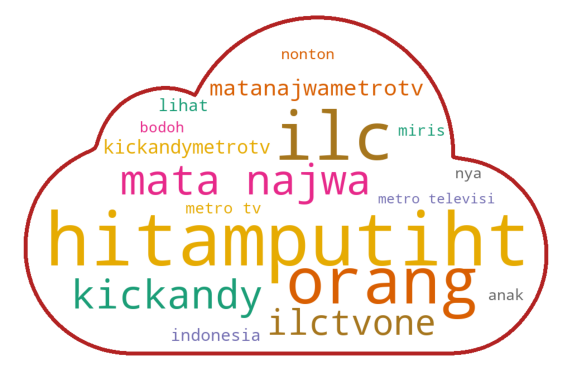

In [196]:
# WordCloud Label Negative Sentiment

negative_normal = data[data.Sentiment == 0]
normal_string = []

for t in negative_normal.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

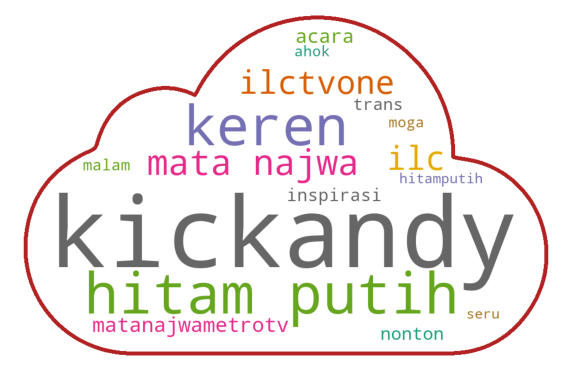

In [197]:
# WordCloud Label Positive Sentiment

positive_fraud = data[data.Sentiment == 1]
fraud_string = []

for t in positive_fraud.clean_teks:
  fraud_string.append(t)

fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Kesimpulan**



Berdasarkan "Analisis Sentimen Terhadap Tayangan Televisi Berdasarkan Opini Masyarakat pada Media Sosial Twitter menggunakan Algoritma Machine Learning Multinomial Naive Bayes" yang telah dilakukan diperoleh akurasi sebesar 0.84 sudah bagus untuk melakukan prediksi sentiment Negative dan Positive pada Text Tweet dengan tepat dimana jumlah prediksi benar yang dihasilkan adalah 67 dan jumlah prediksi salah yang dihasilkan adalah 13.